 <a name="topo"></a>

# Sumário

1. [O Naufrágio do Titanic](#titanic)
2. [Análise Exploratória de Dados (AED)](#aed)  
3. [Visualização de Dados](#vidados)
4. [Engenharia de Recursos](#engenharia)
5. [Machine Learning](#ml)
6. [Validação Cruzada _(Cross-Validation)_](#cv)
7. [Matriz de Confusão](#matrix)
8. [Curvas ROC e AUC](#rocauc)
9. [Customização de Hyper-Parâmetros](#hyperparam)
10. [Ensembling](#ensembling)
11. [Importância de Recursos](#fimportance)
12. [Submissão](#submissao)             

 <a name="titanic"></a>

# O Naufrágio do Titanic
<img src="titanic.jpg" width=100%>

O naufrágio do Titanic é um dos mais infames naufrágios da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia barcos salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas eram mais propensos a sobreviver do que outros.

Nesse desafio, pedimos que você construa um modelo preditivo que responda à pergunta: “que tipo de pessoas têm maior probabilidade de sobreviver?” Usando dados de passageiros (por exemplo, nome, idade, sexo, classe socioeconômica etc.).

Página da Competição: https://www.kaggle.com/c/titanic

Fontes de Consulta: 
* https://www.kaggle.com/startupsci/titanic-data-science-solutions
* https://www.kaggle.com/ash316/eda-to-prediction-dietanic
* https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python
* https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy
* https://www.kaggle.com/cdeotte/titanic-using-name-only-0-81818
* https://www.kaggle.com/cdeotte/titantic-mega-model-0-84210
* https://www.kaggle.com/cdeotte/titanic-wcg-xgboost-0-84688
* https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c
* https://www.kaggle.com/reisel/save-the-families
* https://www.kaggle.com/gunesevitan/advanced-feature-engineering-tutorial-with-titanic
<br>

[início](#topo)

 <a name="aed"></a>

## Análise Exploratória de Dados (AED)
Esse passo é essencial, pois é através dele que iremos construir um entendimento intuitivo dos dados, entender como os parâmetros estão relacionados, procurar e encontrar tendências e relações entre diferentes parâmetros.

<br>

[início](#topo)

### Importar bibliotecas

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

### Ler train e test

In [3]:
treino = pd.read_csv('titanic/train.csv')
teste = pd.read_csv('titanic/test.csv')

### transformar definir o Id do Passageiro como Index

In [4]:
treino.set_index('PassengerId', inplace=True)

In [5]:
teste.set_index('PassengerId', inplace=True)

### Verificar shape dos dois

In [6]:
treino.shape

(891, 11)

In [7]:
teste.shape

(418, 10)

In [8]:
data = pd.concat([treino, teste], sort=True)

### Traduzir Colunas

In [9]:
data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [10]:
data.columns = ['Idade', 
                  'Cabine', 
                  'Embarque', 
                  'Tarifa', 
                  'Nome', 
                  'PaisFilhos', 
                  'Classe', 
                  'Sexo',
                  'IrmaosConjuge', 
                  'Sobreviveu', 
                  'Bilhete']

In [11]:
data.columns

Index(['Idade', 'Cabine', 'Embarque', 'Tarifa', 'Nome', 'PaisFilhos', 'Classe',
       'Sexo', 'IrmaosConjuge', 'Sobreviveu', 'Bilhete'],
      dtype='object')

 <a name="mapsex"></a>

### Mapear Sexo para "homem" e "mulher"

In [12]:
sexo = {'male':'homem', 'female':'mulher'}
sexo

{'male': 'homem', 'female': 'mulher'}

In [13]:
data['Sexo'] = data['Sexo'].map(sexo)
data['Sexo']

PassengerId
1        homem
2       mulher
3       mulher
4       mulher
5        homem
         ...  
1305     homem
1306    mulher
1307     homem
1308     homem
1309     homem
Name: Sexo, Length: 1309, dtype: object

 <a name="portembarque"></a>

 <a name="paracat"></a>

### Parâmetros Categóricos  <a name="nom"></a>
* ### Nominais

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Idade          1046 non-null   float64
 1   Cabine         295 non-null    object 
 2   Embarque       1307 non-null   object 
 3   Tarifa         1308 non-null   float64
 4   Nome           1309 non-null   object 
 5   PaisFilhos     1309 non-null   int64  
 6   Classe         1309 non-null   int64  
 7   Sexo           1309 non-null   object 
 8   IrmaosConjuge  1309 non-null   int64  
 9   Sobreviveu     891 non-null    float64
 10  Bilhete        1309 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [15]:
#  Sexo, Sobreviveu, Embarque

 <a name="ord"></a>

* ### Ordinais

In [16]:
# Classe

 <a name="paranum"></a>

### Parâmetros Numéricos  <a name="cont"></a>
* ### Contínuos

In [17]:
# Idade, Tarifa, 

 <a name="disc"></a>

* ### Discretos

In [18]:
# IrmaosConjuge(Int), PaisFilhos(Int),  

 <a name="paraalfa"></a>

### Parâmetros Alfanuméricos

In [19]:
# Bilhete

 <a name="missing"></a>

### Dados incompletos (faltando dados)

In [20]:
data.isnull().sum()

Idade             263
Cabine           1014
Embarque            2
Tarifa              1
Nome                0
PaisFilhos          0
Classe              0
Sexo                0
IrmaosConjuge       0
Sobreviveu        418
Bilhete             0
dtype: int64

<a name="numinfo"></a>

### Preencher Embarque com Moda

In [21]:
moda = data['Embarque'].mode()[0]
moda

'S'

In [22]:
data['Embarque'].fillna(moda, inplace=True)

### Informações Gerais (Parâmetros Numéricos)

In [23]:
data.describe()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuge,Sobreviveu
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


 <a name="catinfo"></a>

### Informações Gerais de Parâmetros Categóricos

In [24]:
data.describe(include=['O']) # O caractere dentro dos colchetes não é um zero

,Cabine,Embarque,Nome,Sexo,Bilhete
count,295,1309,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Connolly, Miss. Kate",homem,CA. 2343
freq,6,916,2,843,11


 <a name="infoamostra"></a>

## Informações da Amostra

<br>

[início](#topo)

### Tamanho da Amostra

In [25]:
len(data)

1309

### Proporção Total da Amostra em relação à População

In [26]:
len(treino)/2224 # Resultado Estranho

0.4006294964028777

### Proporção de Sobreviventes (População)

In [27]:
1 - 1502/2224 # 100% - (Qt de Pessoas que morreram)/(Numero Total de Pessoas)

0.32464028776978415

### Proporção de Sobreviventes (Amostra)

In [28]:
342/len(treino)

0.3838383838383838

 <a name="agrupamentos"></a>

# Agrupamentos

<br>

[início](#topo)

### Agrupar Classe x Sobrevivência

In [29]:
data[['Classe', 'Sobreviveu']].groupby(['Classe']).mean()\
.sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
Classe,
1,0.629630
2,0.472826
3,0.242363


* Passageiros de Primeira Classe são muito mais propensos a sobreviver do que de Segunda e Terceira Classe
* Passageiros de Segunda Classe são menos propensos a sobreviver do que de Primeira Classe, mas são mais propensos a sobreviver do que de Terceira Classe

### Agrupar Sexo x Sobrevivência

In [30]:
data[['Sexo', 'Sobreviveu']].groupby(['Sexo']).mean()\
.sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
Sexo,
mulher,0.742038
homem,0.188908


* 74% das mulheres sobreviveram em contraste com 18,89% dos homens da nossa amostra

### Agrupar IrmaosConjuge x Sobrevivência

In [31]:
data[['IrmaosConjuge', 'Sobreviveu']].groupby(['IrmaosConjuge']).mean()\
.sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
IrmaosConjuge,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


### Agrupar PaisFilhos x Sobrevivência

In [32]:
data[['PaisFilhos', 'Sobreviveu']].groupby(['PaisFilhos']).mean()\
.sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
PaisFilhos,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000
9,NaN


### Correlação de IrmaosConjuge e PaisFilhos

In [33]:
data[['IrmaosConjuge', 'PaisFilhos']].corr()

,IrmaosConjuge,PaisFilhos
IrmaosConjuge,1.000000,0.373587
PaisFilhos,0.373587,1.000000


* IrmaosConjuge e PaisFilhos não possuem uma correlação muito forte. Talvez seja o caso juntá-los como um único recurso depois

 <a name="vidados"></a>

# Visualização de Dados
Observar os dados de forma visual para averiguar as suposições feitas até agora

<br>

[início](#topo)

### Gráfico de Barras e Pizza de Sobreviventes

Text(0, 0.5, '')

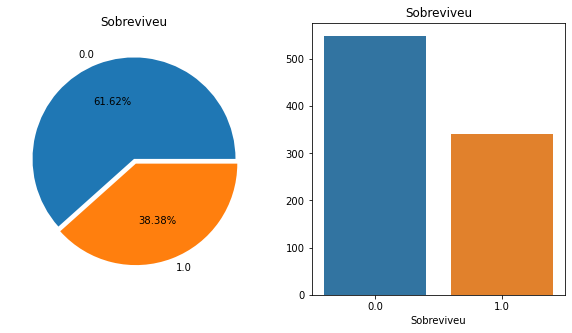

In [34]:
f, ax = plt.subplots(1, 2, figsize=(10,5))
data['Sobreviveu'].value_counts().plot.pie(explode=[0, 0.05], autopct='%0.2f%%', ax=ax[0])
ax[0].set_title('Sobreviveu')
ax[0].set_ylabel('')
sns.countplot('Sobreviveu', data=data, ax=ax[1])
ax[1].set_title('Sobreviveu')
ax[1].set_ylabel('')

## Sobrevivência Por Sexo

In [35]:
data.groupby(['Sobreviveu', 'Sexo'])['Sobreviveu'].count()

Sobreviveu  Sexo  
0.0         homem     468
            mulher     81
1.0         homem     109
            mulher    233
Name: Sobreviveu, dtype: int64

In [36]:
data.loc[data['Sexo']=='mulher']['Sobreviveu'].value_counts()

1.0    233
0.0     81
Name: Sobreviveu, dtype: int64

<a name="barrassob"></a>

### Gráfico de Barras de Sobreviventes por Sexo

<AxesSubplot:xlabel='Sexo', ylabel='count'>

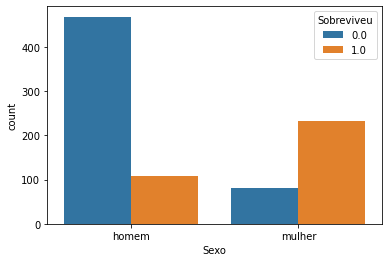

In [37]:
sns.countplot('Sexo', hue='Sobreviveu', data=data)

<a name="histidsob"></a>

### Histograma de Idade x Sobreviveu

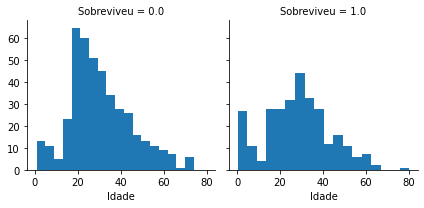

In [38]:
g = sns.FacetGrid(data, col='Sobreviveu')
g.map(plt.hist, 'Idade', bins=18)

* Crianças sobreviveram mais
* Passageiro mais idoso sobreviveu
* A maioria dos passageiros estão na faixa de 18-35 anos (E a maioria não sobreviveu)

<a name="histclassidsob"></a>

### Histograma de Idade x Classe x Sobreviveu com FacetGrid

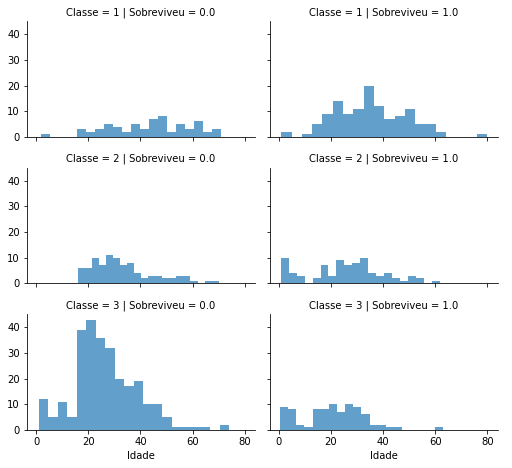

In [39]:
g = sns.FacetGrid(data, col='Sobreviveu', row='Classe', size=2.2, aspect=1.6)
g.map(plt.hist, 'Idade', alpha=0.7, bins=20)
g.add_legend();

<a name="chancesporto"></a>

### Chances de Sobrevivência por Porto de Embarque

<a name="pointplotembarque"></a>

### Embarque x Classe x Sobreviveu

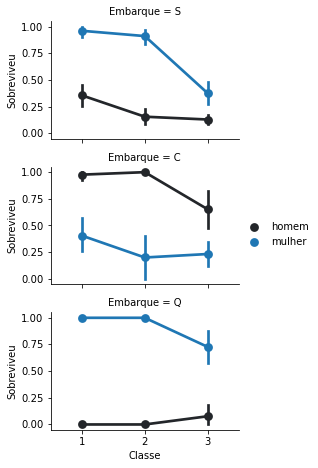

In [40]:
g = sns.FacetGrid(data, row='Embarque', size=2.2, aspect=1.6)
g.map(sns.pointplot, 'Classe', 'Sobreviveu', 'Sexo', pallete='deep')
g.add_legend();

### Agrupar mulheres por sobrevivência

In [41]:
data.loc[data['Sexo']=='mulher'].groupby('Sobreviveu').mean()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuge
Sobreviveu,,,,,
0.0,25.046875,23.024385,1.037037,2.851852,1.209877
1.0,28.847716,51.938573,0.515021,1.918455,0.515021


### Agrupar homens por sobrevivência

In [42]:
data.loc[data['Sexo']=='homem'].groupby('Sobreviveu').mean()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuge
Sobreviveu,,,,,
0.0,31.618056,21.960993,0.207265,2.476496,0.440171
1.0,27.276022,40.821484,0.357798,2.018349,0.385321


<a name="graficobarras"></a>

### Gráfico de Barras Sexo x Tarifa por Sexo

<br>

[início](#topo)

<AxesSubplot:xlabel='Sexo', ylabel='Tarifa'>

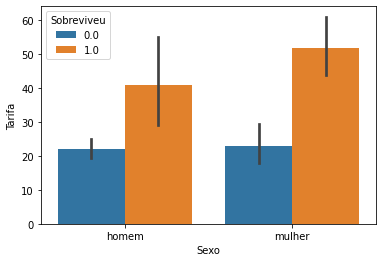

In [43]:
sns.barplot('Sexo', 'Tarifa', hue='Sobreviveu', data=data)

<a name="graficobarrassex"></a>

### Gráfico de Barras Sexo x Tarifa x Embarque x Sobreviveu

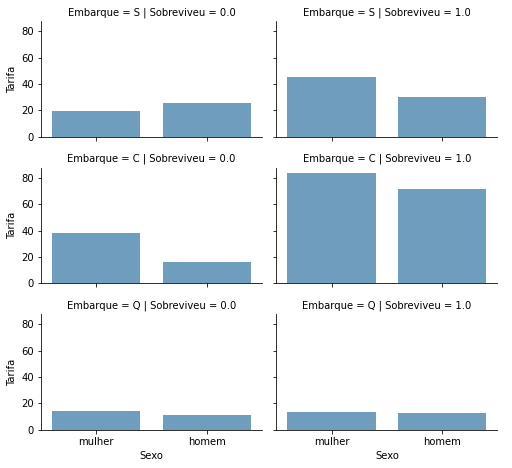

In [44]:
g = sns.FacetGrid(data, row='Embarque',col='Sobreviveu', size=2.2, aspect=1.6)
g.map(sns.barplot, 'Sexo', 'Tarifa', alpha=0.7, ci=None)
g.add_legend();

<a name="pizza"></a>

### Crosstab de Sobrevivência por Classe

In [45]:
pd.crosstab(data['Sobreviveu'], data['Classe'], margins=True)\
.style.background_gradient(cmap='OrRd')

Classe,1,2,3,All
Sobreviveu,,,,
0.0,80,97,372,549
1.0,136,87,119,342
All,216,184,491,891


<a name="vimissing"></a>

## Visualizando Dados Faltando

<br>

[início](#topo)

<AxesSubplot:ylabel='PassengerId'>

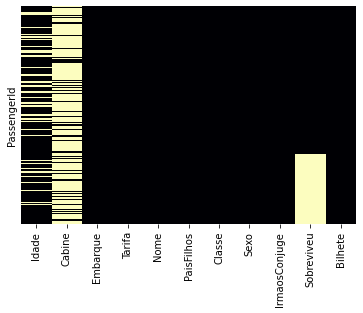

In [46]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='magma')

### Remover Cabine

In [47]:
data.drop('Cabine', axis=1, inplace=True)

<a name="boxplot"></a>

### Boxplot de Classe por Sexo

<AxesSubplot:xlabel='Classe', ylabel='Idade'>

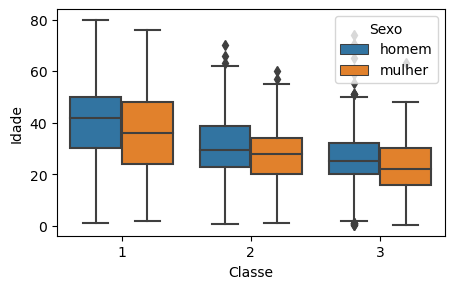

In [48]:
plt.figure(figsize=(5,3), dpi=100)
sns.boxplot(x='Classe', y='Idade', hue='Sexo', data=data)

<a name="engenharia"></a>

# Engenharia de Recursos

<br>

[início](#topo)

### Extrair Titulo do Nome

In [49]:
data['Titulo'] = data['Nome'].str.extract('([a-zA-Z]+)\.')

In [50]:
data['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [51]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [52]:
titulos = ['Miss', 'Master', 'Mr', 'Mrs']
data['Titulo'] = data['Titulo'].apply(lambda x: 'Outros' if x not in titulos else x)

In [53]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


### Traduzir "Titulos"

In [54]:
titulos_traduzidos = {
    'Master':'Menino', 
    'Miss':'Solteira',
    'Mr': 'HomemAdulto',
    'Mrs':'Casada',
    'Outros': 'Outros'
}

In [55]:
data['Titulo'] = data['Titulo'].map(titulos_traduzidos)

# Mulheres e Crianças sobreviveram ou morreram juntos?

## Extrair sobrenome para identificar possíveis famílias

In [70]:
data['Nome'].str.split(',').str[0]

PassengerId
1              Braund
2             Cumings
3           Heikkinen
4            Futrelle
5               Allen
            ...      
1305          Spector
1306    Oliva y Ocana
1307          Saether
1308             Ware
1309            Peter
Name: Nome, Length: 1309, dtype: object

### Criar Feature Sobrenome da Família

In [56]:
# Selecionar o sobrenome de todos mundo
data['Sobrenome'] = data['Nome'].str.split(',').str[0]

### Verificar as maiores famílias

In [57]:
data.groupby(['Sobrenome'])['Nome'].count().sort_values(ascending=False)

Sobrenome
Andersson         11
Sage              11
Goodwin            8
Asplund            8
Davies             7
                  ..
Humblen            1
Hunt               1
Hyman              1
Ibrahim Shawah     1
van Melkebeke      1
Name: Nome, Length: 875, dtype: int64

### Analisar Sobrevivência de Mulheres e Crianças da Família "Andersson"

In [58]:
data[['Sobreviveu', 'Sobrenome', 'Titulo', 'Bilhete', 'Idade']]\
.loc[data['Sobrenome']=='Andersson']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]

,Sobreviveu,Sobrenome,Titulo,Bilhete,Idade
PassengerId,,,,,
69,1.0,Andersson,Solteira,3101281,17.0
120,0.0,Andersson,Solteira,347082,2.0
542,0.0,Andersson,Solteira,347082,9.0
543,0.0,Andersson,Solteira,347082,11.0
611,0.0,Andersson,Casada,347082,39.0
814,0.0,Andersson,Solteira,347082,6.0
851,0.0,Andersson,Menino,347082,4.0
1106,NaN,Andersson,Solteira,347091,38.0


### Mulheres e Crianças da Família "Sage"

In [59]:
data[['Sobreviveu', 'Sobrenome', 'Titulo', 'Bilhete']]\
.loc[data['Sobrenome']=='Sage']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]

,Sobreviveu,Sobrenome,Titulo,Bilhete
PassengerId,,,,
160,0.0,Sage,Menino,CA. 2343
181,0.0,Sage,Solteira,CA. 2343
793,0.0,Sage,Solteira,CA. 2343
864,0.0,Sage,Solteira,CA. 2343
1080,NaN,Sage,Solteira,CA. 2343
1252,NaN,Sage,Menino,CA. 2343
1257,NaN,Sage,Casada,CA. 2343


### Mulheres e Crianças da Família "Brown"

In [106]:
data[['Sobreviveu', 'Sobrenome', 'Sexo', 'Bilhete']]\
.loc[data['Sobrenome']=='Brown']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]

,Sobreviveu,Sobrenome,Sexo,Bilhete
PassengerId,,,,
195,1.0,Brown,mulher,PC 17610
346,1.0,Brown,mulher,248733
671,1.0,Brown,mulher,29750
1067,NaN,Brown,mulher,29750
1248,NaN,Brown,mulher,11769


### Criar DataFrame "MulherOuCrianca"

In [105]:
MulherOuCrianca = data.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]

In [104]:
dt = data[['Titulo', 'Sobreviveu', 'Sexo']]\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Titulo']
dt.unique()

array(['Casada', 'Solteira', 'Menino', 'Outros'], dtype=object)

### Criar Feature "TamanhoGrupo"
Referente a quantidade de Pessoas que possuem o mesmo sobrenome

In [107]:
MulherOuCrianca.loc[MulherOuCrianca['Sobrenome']=='Brown']['Sobreviveu']#.count()

PassengerId
195     1.0
346     1.0
671     1.0
1067    NaN
1248    NaN
Name: Sobreviveu, dtype: float64

In [108]:
data['TamanhoGrupo'] = data['Sobrenome'].apply(lambda x: MulherOuCrianca.loc[MulherOuCrianca['Sobrenome']==x]['Sobreviveu'].count())

### Sobrevivência Família "Andersson"

In [111]:
data.loc[data['Sobrenome']=='Andersson']

,Idade,Embarque,Tarifa,Nome,PaisFilhos,Classe,Sexo,IrmaosConjuge,Sobreviveu,Bilhete,Titulo,Sobrenome,TamanhoGrupo
PassengerId,,,,,,,,,,,,,
14,39.0,S,31.2750,"Andersson, Mr. Anders Johan",5,3,homem,1,0.0,347082,HomemAdulto,Andersson,7
69,17.0,S,7.9250,"Andersson, Miss. Erna Alexandra",2,3,mulher,4,1.0,3101281,Solteira,Andersson,7
120,2.0,S,31.2750,"Andersson, Miss. Ellis Anna Maria",2,3,mulher,4,0.0,347082,Solteira,Andersson,7
147,27.0,S,7.7958,"Andersson, Mr. August Edvard (""Wennerstrom"")",0,3,homem,0,1.0,350043,HomemAdulto,Andersson,7
542,9.0,S,31.2750,"Andersson, Miss. Ingeborg Constanzia",2,3,mulher,4,0.0,347082,Solteira,Andersson,7
543,11.0,S,31.2750,"Andersson, Miss. Sigrid Elisabeth",2,3,mulher,4,0.0,347082,Solteira,Andersson,7
611,39.0,S,31.2750,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",5,3,mulher,1,0.0,347082,Casada,Andersson,7
814,6.0,S,31.2750,"Andersson, Miss. Ebba Iris Alfrida",2,3,mulher,4,0.0,347082,Solteira,Andersson,7
851,4.0,S,31.2750,"Andersson, Master. Sigvard Harald Elias",2,3,homem,4,0.0,347082,Menino,Andersson,7


In [113]:
data.loc[data['Sobrenome']=='Brown']

array(['Casada', 'Solteira', 'HomemAdulto'], dtype=object)

### Criar Recurso "SobrevivenciaGrupo"

###  Grupos de Mulheres e Criancas onde todos morreram juntos

### Quantidade de Pessoas (morreram)

###  Grupos de Mulheres e Criancas onde todos sobreviveram juntos

### Quantidade de Pessoas (sobreviveram)

###  Grupos de Mulheres e Criancas com sobrevivência mista

### Quantidade de Pessoas (sobrevivência mista)

### Criar Recurso ExpecativaDeVida

### Poderíamos linkar com o Bilhete
Uma vez que não necessariamente esses grupos são da mesma família, e nem todos que possuem o mesmo sobrenome são da mesma família. Porém, existem divergências ao análisar apenas os bilhetes. O ideal seria combiná-los para gerar ainda mais insights.

<a name="dummy"></a>

### Remover Colunas que não serão mais utilizadas

# Variáveis Dummy

<br>

[início](#topo)

# Usar Predição da Idade

<br>

[início](#topo)

## Preencher Tarifa Faltando Com a Média

<br>

[início](#topo)

<a name="faixaetaria"></a>

# Criar Faixa Etária

<br>

[início](#topo)

 <a name="dummyfe"></a>

### Dummy Faixa Etaria

 <a name="familiares"></a>

### Criar Recurso "Familiares" _(Feature Engeneering)_ 
Baseados em IrmaosConjuge e PaisFilhos

<br>

[início](#topo)

 <a name="sozinho"></a>

### Criar Parâmetro "Sozinho"_(Feature Engeneering)_
Pessoa que não está com nenhum familiar

<br>

[início](#topo)

## Atualizar train e test 

## Utilizar train para treinar o modelo

### Escolher colunas

### Averiguando Shapes 

### Importar train_test_split para dividir e preparar para treino

### Dividir 70% para treinar, 30% para testar

<a name="ml"></a>

# Machine Learning <a name="modelospred"></a>

<br>

[início](#topo)

## Importando Modelos Preditivos

In [63]:
from sklearn.ensemble import (AdaBoostClassifier, 
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier,
                              RandomForestClassifier)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

<a name="LogisticRegression"></a>

### Criar classe ModeloAuxiliar 
Uma classe modelo para evitar duplicação de códigos

In [65]:
class ModeloAuxiliar(object):
    def __init__(self, clf, seed=123, params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def score(self,x,y):
        return self.clf.score(x,y)

In [66]:
modelos = [{'nome': 'logreg',
            'modelo': LogisticRegression},
           {'nome': 'etree',
            'modelo': ExtraTreesClassifier},
           {'nome': 'gradboost',
             'modelo': GradientBoostingClassifier}, 
           {'nome': 'adaboost',
             'modelo': AdaBoostClassifier},
           {'nome': 'SVC',
            'modelo': SVC},
           {'nome': 'KNN',
            'modelo': KNeighborsClassifier},
           {'nome': 'GaussianNB',
            'modelo': GaussianNB},
           {'nome': 'Perceptron',
            'modelo': Perceptron},
           {'nome': 'LinearSVC',
            'modelo': LinearSVC},
           {'nome': 'SGD',
            'modelo': SGDClassifier},
           {'nome': 'Dtree',
            'modelo': DecisionTreeClassifier},
           {'nome': 'RForest',
            'modelo': RandomForestClassifier}
          ]

<a name="ranking"></a>

# Ranking de Modelos Por Score

<br>

[início](#topo)

<a name="cv"></a>

# Validação Cruzada _(Cross-Validation)_

<br>

[início](#topo)

In [67]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 

<a name="matrix"></a>

# Matriz de Confusão 

Essa média as vezes pode ser enganosa. Nós podemos analisar a Matriz de Confusão _(Confusion Matrix)_ que nos mostra aonde o modelo errou. Falsos Positivos x Falso Negativos.

<br>

[início](#topo)

### Interpretando a Matriz de Confusão
A diagonal da esquerda mostra o total de predições corretas, a da direita mostra o total de predições erradas.

* O número de predições corretas para AdaBoost é de **167(para mortos) + 76(sobreviventes)**.<br><br>

* **Erros**  
    * Classificou erradamente **3 como mortos (falso negativo)** 
    * E **22 como vivos (falso positivo)**

<a name="precision"></a>

$$Precisão = {\frac {Verdadeiros Positivos}{Verdadeiros Positivos + Falsos Positivos}} $$

<a name="accuracy"></a>

$$Revocação = {\frac {Verdadeiros Positivos}{Verdadeiros Positivos + Falsos Negativos}} $$

<a name="accuracy"></a>

$$Acuracidade = {\frac {Verdadeiros Positivos+Verdadeiros Negativos}{Total}} $$

<a name="accuracy"></a>

$$F1-Score = 2 x{\frac {Precisão \cdot Revocação}{Precisão + Revocação}} $$

### Importando métricas do Sklearn

### Revocação

### Acuracidade

### Precisão

### F1-Score

<a name="rocauc"></a>

# Curvas ROC e AUC 

O formato da curva contem várias informações, dentre elas, a taxa esperada de falsos positivos e taxa esperada de falsos negativos. 
* O quanto menor for o eixo x menor a quantidade de falsos positivos e maior verdadeiros negativos. 
* Quanto maiores os valores no eixo y, maior a quantidade de verdadeiros positivos e menor a quantidade de falsos negativos.

<br>

[início](#topo)

## Selecionando Threshold (Limite)

<a name="hyperparam"></a>

# Customização de Hyper-Parâmetros 

<br>

[início](#topo)

**Parâmetros**

**n_jobs**: Quantidade de núcleos do CPU usados no processo de treino do modelo preditivo. Se for -1, todos os núcleos serão usados.

**n_estimators**: Quantidade de árvores de classificação usadas no modelo preditivo (10 é o padrão)

**max_depth**: Profundidade de árvore ou a quantidade de nós que ela deve se expandir. Se esse valor for muito alto, existe a chance de o modelo super-adequar _(overfit)_ o modelo.

**min_samples_leaf**: O número mínimo de amostras requeridas para ser considerado um ramo. Isso tende a suavizar o modelo.

**verbose**: Controla a saída de textos durante o processo de aprendizagem/treino. O valor 0 não mostra nenhum texto, enquanto 3 mostra o processo de aprendizagem de árvore a cada iteração.

In [68]:
from sklearn.model_selection import GridSearchCV

* ### Random Forest

<a name="ensembling"></a>

# Ensembling
Uma forma de aumentar a acuracidade ou performance do modelo preditivo. Ensembling é a combinação de vários modelos preditivos de forma a ter uma versão final mais poderosa e mais estável. Ensembling pode ser feito de 3 formas:
* Classificão de Votos (Voting Classifier)
* Ensacamento (Bagging)
* Impulsionamento (Boosting)

<br>

[início](#topo)

<a name="voting"></a>

* ### Classificação de Votos

<a name="bagging"></a>

* ### Ensacamento
O Ensacamento aplica classificadores similares em pequenas partições, depois tira a média reduzindo a variância. Diferente da técnica de Classificação de Votos, Ensacamento usa classificadores similares aumentando a estabilidade. 

* #### Ensacamento KNN
Ele é ideal para usar com modelos que possuem muita variância. Pode ser usado com um pequeno valor de n_neighbours, como com um pequeno valor de n_estimators.

In [69]:
from sklearn.ensemble import BaggingClassifier

* #### Ensacamento DecisionTree


<a name="boosting"></a>

* ### Impulsionamento
Impulsionamento é uma técnica ensembling que usa aprendizado sequenciado de classificadores. É um melhoramento gradual de um modelo fraco. O modelo é treinado no dataframe completo, de forma a focar nos erros, tentando melhorá-los iterativamente de forma contínua. 

* #### Exemplos (Impulsionamento Adaptativo): 
    * AdaBoost  
    * GradientBoostingClassifier 
<br>

[início](#topo)

* ### GradientBoostingClassifier

* ### Configurando Hyper-Parâmetros para o AdaBoost

<a name="combinado"></a>

<a name="fimportance"></a>

# Importância de Recursos _(Feature Importance)_ 

<br>

[início](#topo)

<a name="submissao"></a>

# Submissão

<br>

[início](#topo)